## Set up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Gradient function

In [2]:
def f2(alpha, l):
    denom = (np.log(l)*(l**alpha) - np.log(1+l**alpha)/alpha)*(l**alpha + 1)
    num = -alpha * (1+l**alpha)**(1/alpha)
    return num/denom

In [3]:
f2(3, 1)

8.179568327677273

In [4]:
f2(3, 2)

-0.14406700966550182

## Plot the gradient

In [5]:
g = lambda x: f2(3, x)

In [6]:
X = np.linspace(0, 10, 100)

In [7]:
Y = g(X)

/tmp/ipykernel_18735/2244637516.py:2: RuntimeWarning: divide by zero encountered in log
  denom = (np.log(l)*(l**alpha) - np.log(1+l**alpha)/alpha)*(l**alpha + 1)
/tmp/ipykernel_18735/2244637516.py:2: RuntimeWarning: invalid value encountered in multiply
  denom = (np.log(l)*(l**alpha) - np.log(1+l**alpha)/alpha)*(l**alpha + 1)


In [8]:
Y

array([            nan,  1.10785797e+03,  1.87368921e+02,  6.95186817e+01,
        3.54639192e+01,  2.15522734e+01,  1.47011601e+01,  1.09734303e+01,
        8.91513555e+00,  7.99081658e+00,  8.28707344e+00,  1.17675559e+01,
       -9.08506957e+02, -6.12808171e+00, -2.30218584e+00, -1.16778813e+00,
       -6.75519917e-01, -4.22206570e-01, -2.78179098e-01, -1.90610653e-01,
       -1.34692559e-01, -9.76020171e-02, -7.22335524e-02, -5.44343617e-02,
       -4.16721723e-02, -3.23481758e-02, -2.54229604e-02, -2.02036376e-02,
       -1.62181361e-02, -1.31385906e-02, -1.07333623e-02, -8.83626278e-03,
       -7.32639162e-03, -6.11467365e-03, -5.13471583e-03, -4.33650030e-03,
       -3.68197201e-03, -3.14191120e-03, -2.69369018e-03, -2.31964610e-03,
       -2.00588846e-03, -1.74141682e-03, -1.51746194e-03, -1.32698974e-03,
       -1.16432481e-03, -1.02486248e-03, -9.04847154e-04, -8.01200395e-04,
       -7.11386827e-04, -6.33308882e-04, -5.65223700e-04, -5.05677184e-04,
       -4.53451376e-04, -

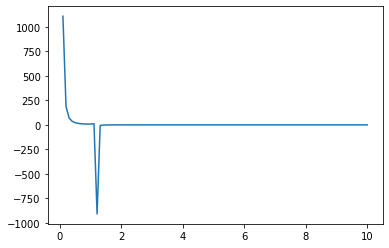

In [9]:
plt.plot(X, Y)

## Ploting different alphas

In [10]:
X = np.linspace(0.0001, 0.9999, 100)

<IPython.core.display.Javascript object>


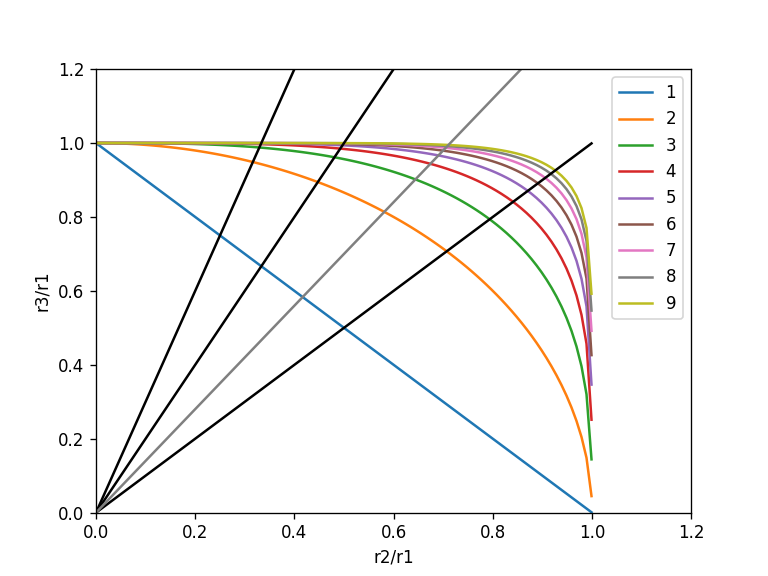

In [23]:
%matplotlib notebook

for i in range(1, 10):
    f = lambda x: (1 - x**i)**(1/i)
    Y = f(X)
    plt.plot(X, Y, label = f"{i}")
for j in range(1, 4):
    f = lambda x: x*j
    Y = f(X)
    plt.plot(X, Y, color = "black")
f = lambda x: x*1.4
Y = f(X)
plt.plot(X, Y, color = "grey")
ax = plt.gca()
ax.set_ylim([0, 1.2])
ax.set_xlim([0, 1.2])
plt.xlabel("r2/r1")
plt.ylabel("r3/r1")
plt.legend()

<IPython.core.display.Javascript object>


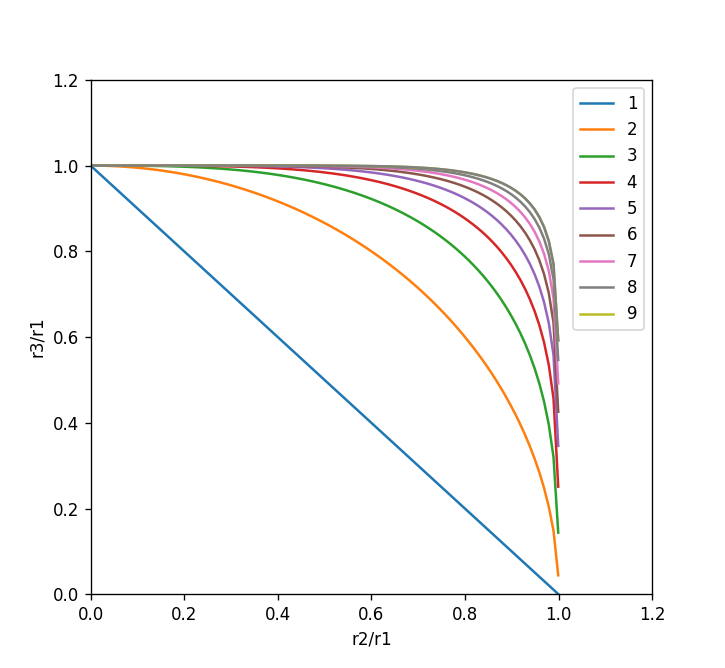

In [49]:
%matplotlib notebook

for i in range(1, 10):
    f = lambda x: (1 - x**i)**(1/i)
    Y = f(X)
    plt.plot(X, Y, label = f"{i}")

Y = f(X)
plt.plot(X, Y, color = "grey")
ax = plt.gca()
ax.set_ylim([0, 1.2])
ax.set_xlim([0, 1.2])
plt.xlabel("r2/r1")
plt.ylabel("r3/r1")
plt.legend()

## Plot specific alpha

In [24]:
f = lambda p1, alpha : (1-p1**alpha)**(1/alpha)
g = lambda p1: f(p1, 3)

<IPython.core.display.Javascript object>


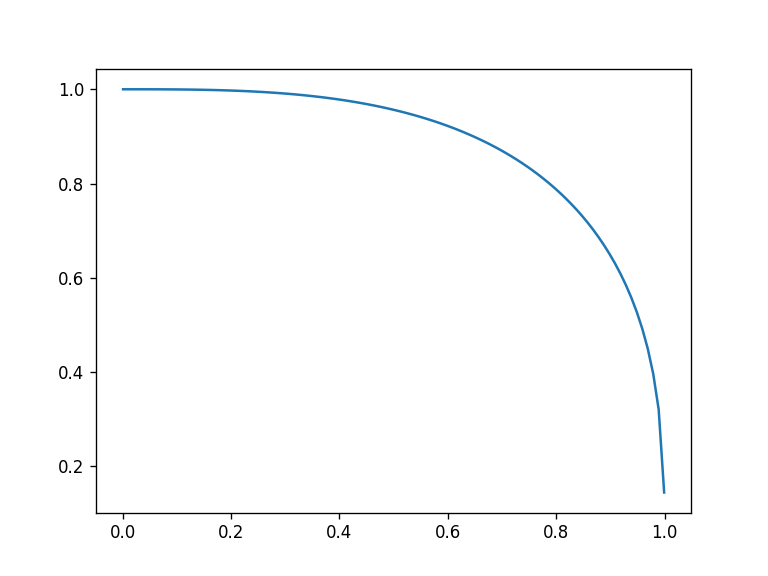

In [25]:
X = np.linspace(0.001, 0.999, 100)
Y = g(X)
plt.plot(X, Y)

## Trying out

Gradient functions

In [26]:
p2_fun = lambda alpha, p1 : (1-p1**alpha)**(1/alpha)

In [27]:
def f1(alpha, p1, p2):
    return - alpha * p1**(alpha-1) / (np.log(p1)*(p1**alpha) + np.log(p2)*(p2**alpha))

In [28]:
def f2(alpha, p1, p2):
    return - alpha * p2**(alpha-1) / (np.log(p1)*(p1**alpha) + np.log(p2)*(p2**alpha))

In [29]:
def f1_bis(alpha, p1):
    p2 = p2_fun(alpha, p1)
    return f1(alpha, p1, p2)

In [30]:
def f2_bis(alpha, p1):
    p2 = p2_fun(alpha, p1)
    return f2(alpha, p1, p2)

<IPython.core.display.Javascript object>


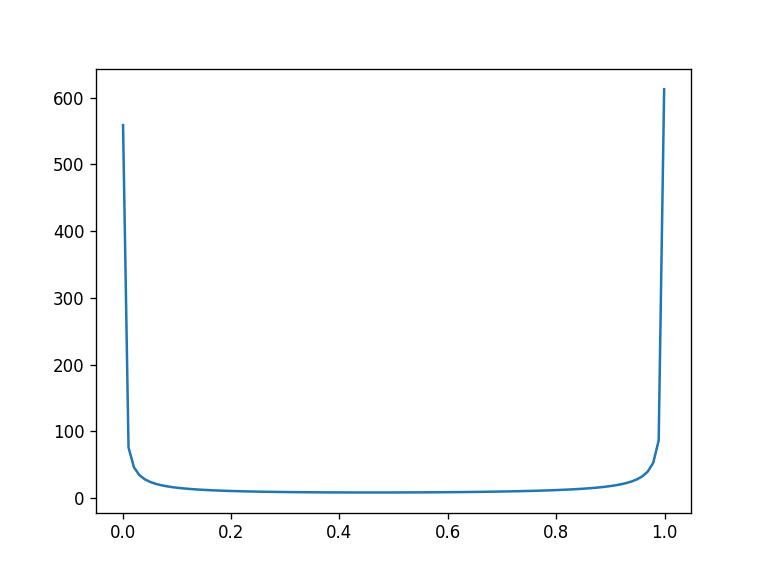

In [31]:
X = np.linspace(0.001, 0.999, 100)
fff = lambda x: f1_bis(4, x)
Y = fff(X)
plt.plot(X, Y)

<IPython.core.display.Javascript object>


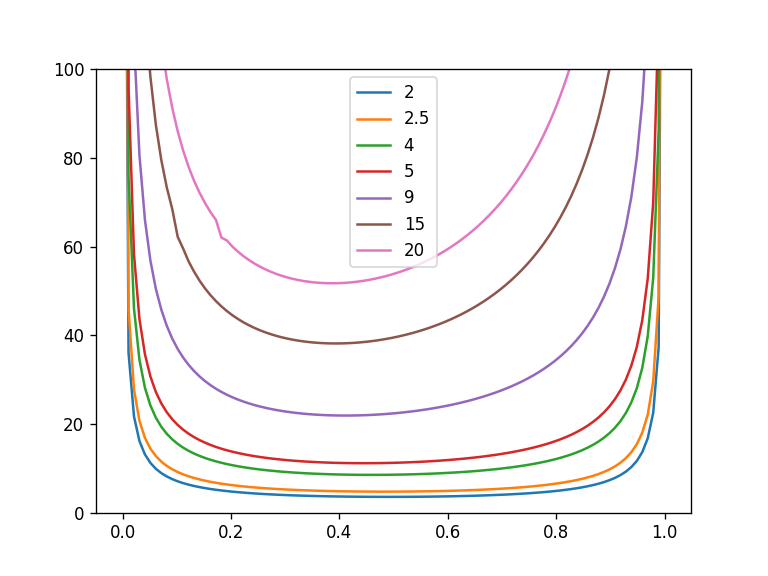

In [32]:
X = np.linspace(0.001, 0.999, 100)
for alpha in [2, 2.5, 4, 5, 9, 15, 20]:
    prov = lambda x: f1_bis(alpha, x)
    Y = prov(X)
    plt.plot(X, Y, label = f"{alpha}")
    ax = plt.gca()
    ax.set_ylim([0, 100])
plt.legend()

<IPython.core.display.Javascript object>


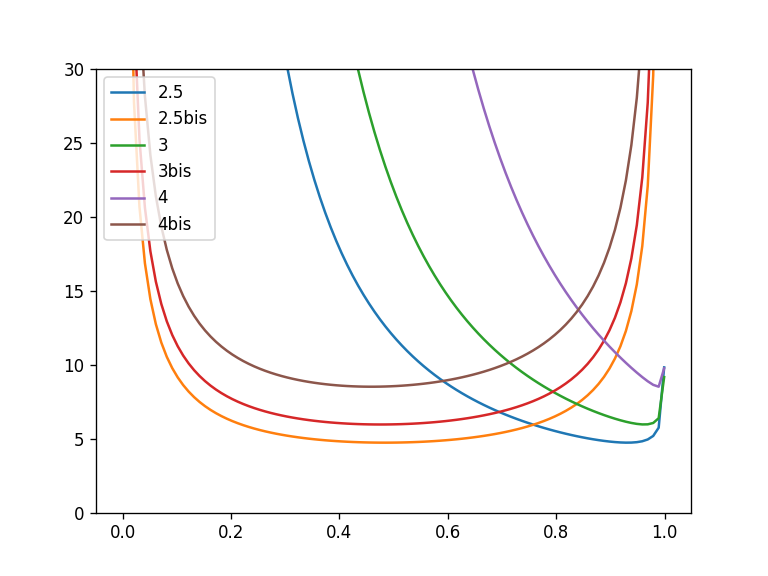

In [33]:
X = np.linspace(0.001, 0.999, 100)
for alpha in [2.5, 3, 4]:
    prov = lambda x: f2_bis(alpha, x)
    prov2 = lambda x: f1_bis(alpha, x)
    Y = prov(X)
    Y_ = prov2(X)
    plt.plot(X, Y, label = f"{alpha}")
    plt.plot(X, Y_, label = f"{alpha}bis")
    ax = plt.gca()
    ax.set_ylim([0, 30])
plt.legend()

## Propre

In [34]:
p1_f = lambda l, alpha: (l**alpha/(1+l**alpha))**(1/alpha)
p2_f = lambda l, alpha: (1/(1+l**alpha))**(1/alpha)

TEST

In [35]:
print(p1_f(1, 3))
print(p2_f(1, 3))

0.7937005259840998
0.7937005259840998


In [36]:
print(p1_f(2, 3))
print(p2_f(2, 3))

0.9614997135382722
0.4807498567691361


In [38]:
print(p1_f(1.4, 3))
print(p2_f(1.4, 3))

0.9016045380701652
0.6440032414786895


In [39]:
def grad_phi(p1, p2, alpha):
    factor = -alpha/(np.log(p1)*(p1**alpha) + np.log(p2)*(p2**alpha))
    return factor * np.array([p1**(alpha-1), p2**(alpha-1)])

TEST

In [40]:
grad_phi(0.79, 0.79, 3)

array([8.05496089, 8.05496089])

In [41]:
grad_phi(0.9614997135382722, 0.4807498567691361, 3)

array([23.85197747,  5.96299437])

In [42]:
grad_phi(0.4807498567691361, 0.9614997135382722, 3)

array([ 5.96299437, 23.85197747])

In [43]:
grad_phi(0.4807498567691361, 0.9614997135382722, 3)

array([ 5.96299437, 23.85197747])

In [44]:
def grad_phi_simple(l, alpha):
    p1 = p1_f(l, alpha)
    p2 = p2_f(l, alpha)
    print(f"Alpha: {alpha}; p1: {p1}; p2: {p2}")
    return grad_phi(p1, p2, alpha)

TEST

In [45]:
grad_phi_simple(2, 3)

Alpha: 3; p1: 0.9614997135382722; p2: 0.4807498567691361


array([23.85197747,  5.96299437])

In [46]:
grad_phi_simple(1, 3)

Alpha: 3; p1: 0.7937005259840998; p2: 0.7937005259840998


array([8.17956833, 8.17956833])

In [47]:
grad_phi_simple(2.5, 3)

Alpha: 3; p1: 0.9795338696951598; p2: 0.39181354787806394


array([37.9775624 ,  6.07640998])

In [48]:
grad_phi_simple(1.4, 3)

Alpha: 3; p1: 0.9016045380701652; p2: 0.6440032414786895


array([12.60627957,  6.43177529])